In [1]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке, 
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
# 
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию, 
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными, 
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

In [64]:
pip install nbconvert[webpdf]

     -------------------------------------- 83.4/83.4 kB 334.0 kB/s eta 0:00:00
     ------------------------------------ 101.4/101.4 kB 278.0 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


### Область работы 1 (библиотеки)

In [2]:
# Данный блок в области 1 НЕ выполняется преподавателем
# 
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
#
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
#
# pip install

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold, StratifiedShuffleSplit, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from tqdm import tqdm
from sklearn.metrics import precision_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score, KFold, StratifiedShuffleSplit, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from tqdm import tqdm
from sklearn.metrics import precision_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
import category_encoders as ce

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer
from sklearn.metrics import mean_absolute_percentage_error
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import Ridge, Lasso, Lars, LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import OrdinalEncoder

from sklearn.impute import KNNImputer
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import r2_score

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, log_loss, zero_one_loss
from sklearn.linear_model import LogisticRegression

### Область работы 2 (поиск  модели .... )

In [4]:
# Данный блок(и) НЕ выполняются преподавателем в области 2
# блок(и) предназначены для поиска лучшей модели 
# должен быть понятен и очевиден отбор параметров модели
# 
# Запрещается размещать данные блоки за пределами обасти 2
# Все блоки данной области должны быть выполнены
#
# ЗАПРЕЩАЕТСЯ ИСПОЛЬЗОВАТЬ ТЕСТОВАЙ НАБОР
#
# Путь к тренировочному набору
# 

path_train = 'train.csv' # содержит только имя файла, без имен папок !!!

In [5]:
df = pd.read_csv(path_train)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,227.0,53.770925,9.366219,29.0,46.0,54.0,61.0,77.0
sex,227.0,0.696035,0.460984,0.0,0.0,1.0,1.0,1.0
cp,227.0,0.982379,1.047394,0.0,0.0,1.0,2.0,3.0
trestbps,227.0,130.422907,16.846969,94.0,120.0,130.0,140.0,192.0
chol,227.0,243.837004,52.802645,126.0,210.5,239.0,269.5,564.0
fbs,227.0,0.136564,0.344145,0.0,0.0,0.0,0.0,1.0
restecg,227.0,0.524229,0.517895,0.0,0.0,1.0,1.0,2.0
thalach,227.0,149.925110,23.335541,71.0,132.5,153.0,168.0,202.0
exang,227.0,0.339207,0.474486,0.0,0.0,0.0,1.0,1.0
oldpeak,227.0,0.998678,1.154578,0.0,0.0,0.6,1.6,6.2


In [6]:
# отбор всех сторок с пропущенными значениям в любом месте колонки
df[df.isna().any(axis=1)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [7]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
print(df.duplicated().sum())


1


In [9]:
df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
208,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [10]:
# очищаем от дубликатов
df = df[~df.duplicated()] # очистка от дубликатов
display(df)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
1,42,0,2,120,209,0,1,173,0,0.0,1,0,2,1
2,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
3,62,0,0,150,244,0,1,154,1,1.4,1,0,2,0
4,53,0,0,138,234,0,0,160,0,0.0,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,60,1,0,130,206,0,0,132,1,2.4,1,2,3,0
223,51,0,0,130,305,0,1,142,1,1.2,1,0,3,0
224,64,0,0,130,303,0,1,122,0,2.0,1,2,2,1
225,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0


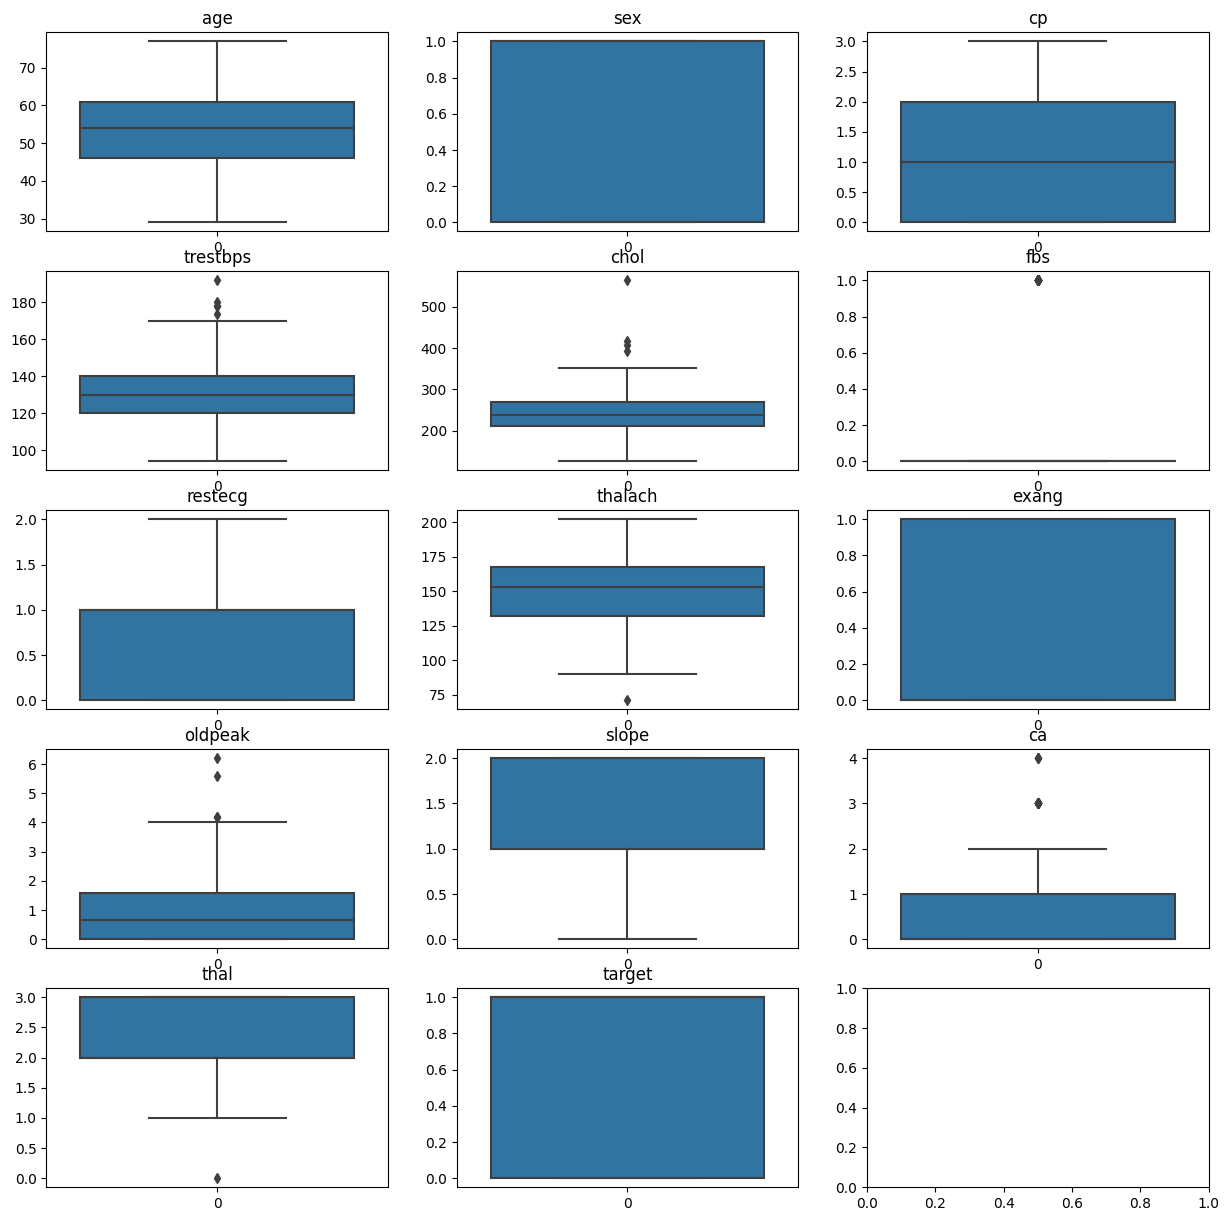

In [11]:
import math
col_nums = 3  # how many plots per row
row_nums = math.ceil(len(df.select_dtypes(include=[np.number]).columns) / col_nums)  # how many rows of plots
# print(col_nums, row_nums)
_, axes = plt.subplots(nrows=row_nums, ncols=col_nums, figsize=(15,15))
for i, col in enumerate(df.select_dtypes(include=[np.number]).columns):
    sns.boxplot(data=df[col], ax=axes.flatten()[i]).set_title(col)
plt.show()

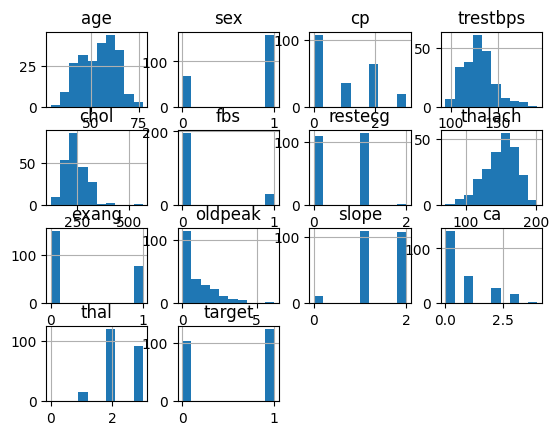

In [12]:
df.hist();

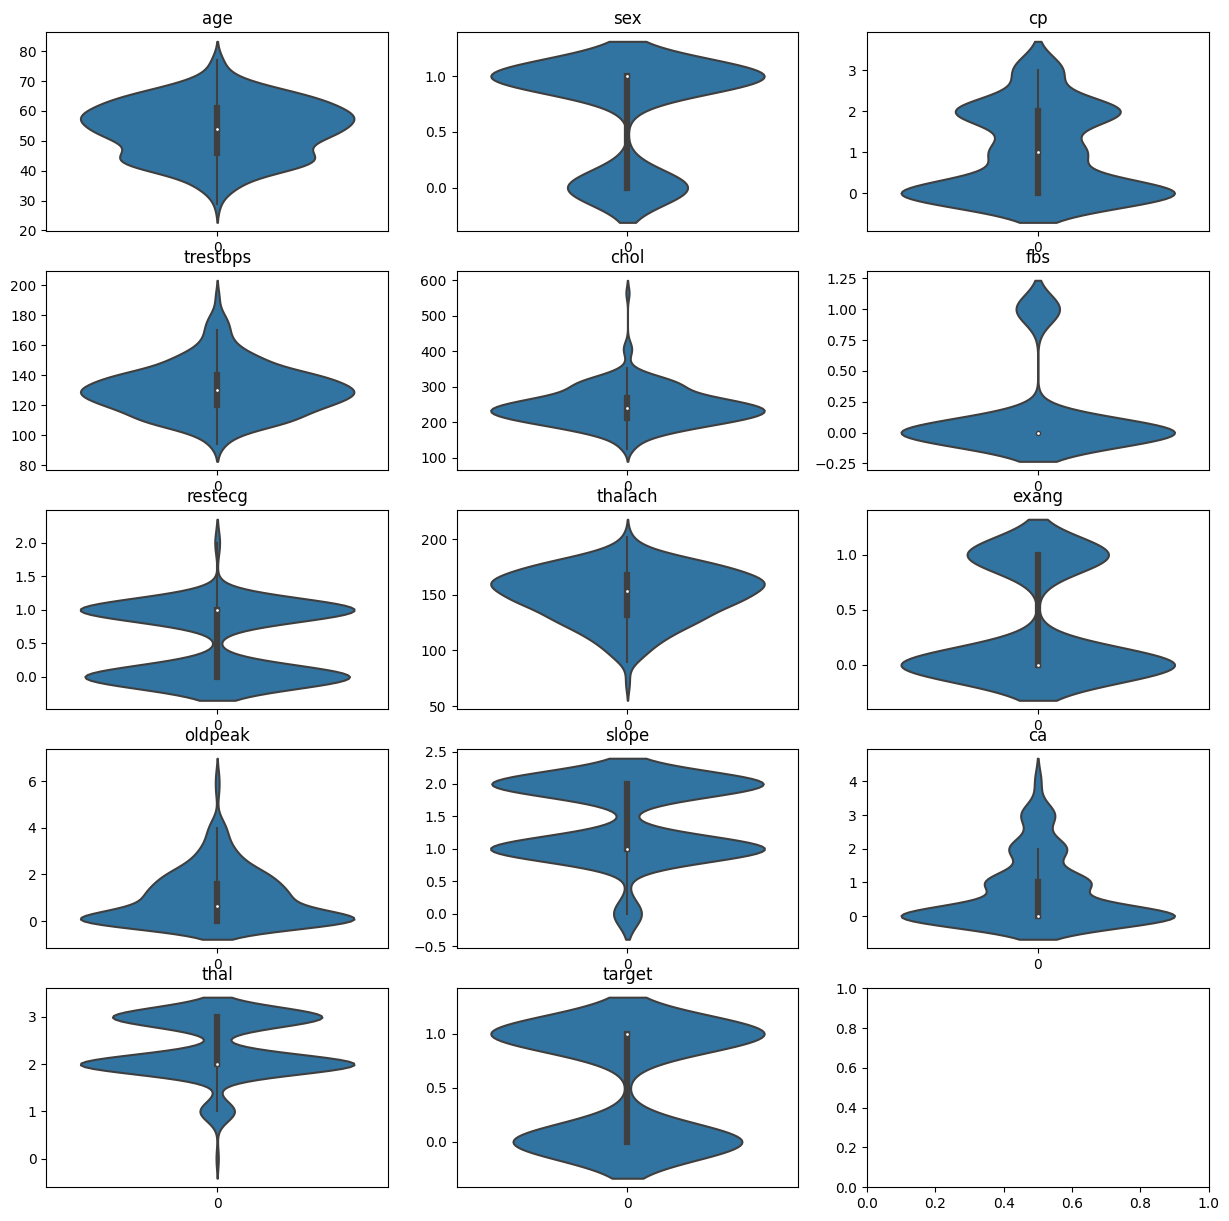

In [13]:
import math
col_nums = 3  # how many plots per row
row_nums = math.ceil(len(df.select_dtypes(include=[np.number]).columns) / col_nums)  # how many rows of plots
# print(col_nums, row_nums)
_, axes = plt.subplots(nrows=row_nums, ncols=col_nums, figsize=(15,15))
for i, col in enumerate(df.select_dtypes(include=[np.number]).columns):
    sns.violinplot(data=df[col], ax=axes.flatten()[i]).set_title(col)
plt.show()

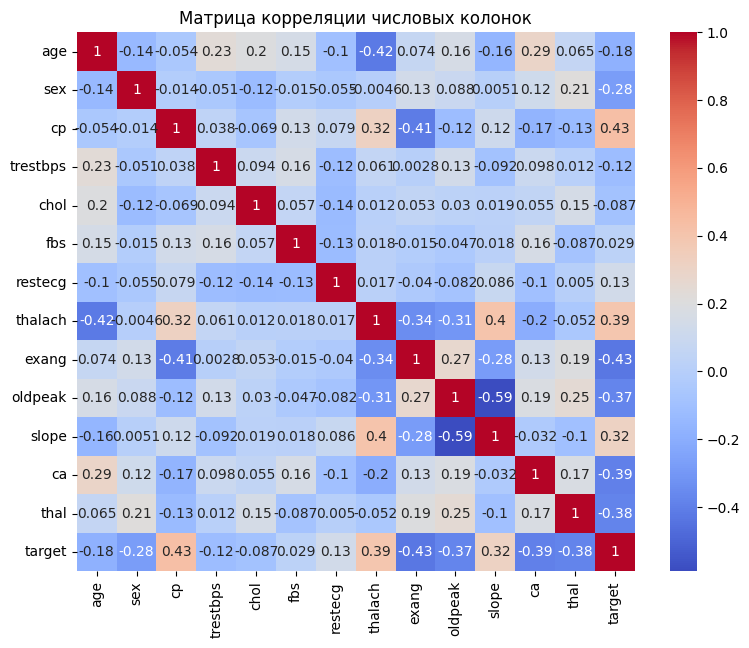

In [14]:
corr_matrix = df.corr()
plt.figure(figsize=(9, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# добавляем заголовок
plt.title('Матрица корреляции числовых колонок')

# отображаем график
plt.show()

In [15]:
for col in df.columns:
    unique_vals = df[col].unique()
    print(f"Уникальные элементы колонки {col}: {unique_vals}")

Уникальные элементы колонки age: [63 42 50 62 53 35 58 57 45 39 49 41 55 64 54 46 44 40 59 52 65 34 43 67
 48 61 60 38 71 51 69 56 47 37 68 66 76 77 29 74 70]
Уникальные элементы колонки sex: [1 0]
Уникальные элементы колонки cp: [0 2 1 3]
Уникальные элементы колонки trestbps: [140 120 110 150 138 112 104 134 128 130 126 160 135 174 108 154 155 136
 145 118 125 132 122 170  94 102 180 115 152 124 106 164 146 178 100 192
 142 123 148 105 129]
Уникальные элементы колонки chol: [187 209 254 244 234 183 230 276 208 321 271 216 231 306 289 335 239 252
 160 246 263 199 249 233 232 269 319 182 315 196 224 222 197 164 264 203
 311 290 205 177 270 172 180 210 169 288 268 207 178 175 295 265 260 308
 309 214 227 318 325 303 282 259 192 204 243 201 229 564 313 221 149 298
 300 330 255 157 250 223 237 299 256 211 186 353 176 258 218 228 247 407
 394 326 226 236 225 261 235 219 304 341 198 217 275 245 277 417 212 283
 188 131 267 195 193 184 240 167 266 141 262 248 253 242 220 274 322 126
 281 206 

In [16]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
1,42,0,2,120,209,0,1,173,0,0.0,1,0,2,1
2,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
3,62,0,0,150,244,0,1,154,1,1.4,1,0,2,0
4,53,0,0,138,234,0,0,160,0,0.0,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,60,1,0,130,206,0,0,132,1,2.4,1,2,3,0
223,51,0,0,130,305,0,1,142,1,1.2,1,0,3,0
224,64,0,0,130,303,0,1,122,0,2.0,1,2,2,1
225,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0


In [17]:
X = df.drop(['target'], axis = 1)
y = df.target

In [18]:
y.mean()

0.5442477876106194

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y)

In [20]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
86,45,0,1,130,234,0,0,175,0,0.6,1,0,2
27,65,0,2,155,269,0,1,148,0,0.8,2,0,2
218,64,1,3,170,227,0,0,155,0,0.6,1,0,3
184,54,1,0,124,266,0,0,109,1,2.2,1,1,3
80,67,0,2,115,564,0,0,160,0,1.6,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,58,1,2,105,240,0,0,154,1,0.6,1,0,3
28,46,1,0,120,249,0,0,144,0,0.8,2,0,3
147,54,1,0,110,239,0,1,126,1,2.8,1,1,3
2,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [52]:
axis_features = ['age','sex','trestbps','chol','fbs', 'restecg','thalach','exang','oldpeak', 'ca', 'thal', 'cp','slope'] # сюда вписываются числовые колонки
categorical_features = [] # сюда вписываются категориальные колонки для OneHotEncoder
categorical_ordinal = [] # сюда вписываются категориальные в перевод в числа без приориотизации (например, бинарные 0 1)
categorical_with_order = ['cp'] # сюда вписываются категориальная колонка для перевода в числа с приоритизацией порядка (от 0 до N)

# здесь идет преобразование числовых
imputer_for_nums = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors = 5, missing_values=np.nan)),
    ('scaler', MinMaxScaler())
])

imputer_for_categorical_OHE = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),   
    ('scaler', OneHotEncoder(handle_unknown='ignore'))
    
])

imputer_for_categorical_ordinal = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scaler', OrdinalEncoder())
    
])

# order_for_cat = [{
#     'col':'cp',
#     'mapping':{1:4, 2:3, 3:2, 4:1}
#     }]

# imputer_for_categorical_with_order = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('ce',ce.OrdinalEncoder(mapping=order_for_cat)),
#     ('scaler', MinMaxScaler())
#     ])



CT = ColumnTransformer([
    
        ("imputer_for_nums", imputer_for_nums, axis_features), # здесь идет преобразование числовых
        ("imputer_for_categorical_OHE", imputer_for_categorical_OHE, categorical_features), ## здесь onehotencoder (страны, города и тд)
#         ("imputer_for_categorical_ordinal", imputer_for_categorical_ordinal, categorical_ordinal), # преобразование категорий в бинарные 0 1
#         ("imputer_for_categorical_with_order", imputer_for_categorical_with_order, categorical_with_order) # преобразование категорий в приоритизированный массив от 0 до N

             ], 
    
        remainder = 'passthrough')

display(CT)

res_ct = CT.fit_transform(X_train)

ColumnTransformer(n_jobs=None, remainder='passthrough', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('imputer_for_nums',
                                 Pipeline(memory=None,
                                          steps=[('imputer',
                                                  KNNImputer(add_indicator=False,
                                                             copy=True,
                                                             keep_empty_features=False,
                                                             metric='nan_euclidean',
                                                             missing_values=nan,
                                                             n_neighbors=5,
                                                             weights='uniform')),
                                                 ('scaler',
                                                  MinMaxScaler(clip=False,...
                                                                fill_value=None,
                                                                keep_empty_features=False,
                                                                missing_values=nan,
                                                                strategy='most_frequent',
                                                                verbose='deprecated')),
                                                 ('scaler',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='ignore',
                                                                max_categories=None,
                                                                min_frequency=None,
                                                                sparse='deprecated',
                                                                sparse_output=True))],
                                          verbose=False),
                                 [])],
                  verbose=False, verbose_feature_names_out=True)

In [53]:
X_train_new = pd.DataFrame(res_ct, columns=CT.get_feature_names_out())


display(X_train_new.T)

X_test_new = pd.DataFrame(CT.transform(X_test), columns=CT.get_feature_names_out())


display(X_test_new.T)

,0,1,2,3,4,5,6,7,8,9,...,159,160,161,162,163,164,165,166,167,168
imputer_for_nums__age,0.333333,0.750000,0.729167,0.520833,0.791667,0.770833,0.354167,0.666667,0.104167,0.687500,...,0.541667,0.437500,0.479167,0.500000,0.625000,0.604167,0.354167,0.520833,0.437500,0.791667
imputer_for_nums__sex,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
imputer_for_nums__trestbps,0.418605,0.709302,0.883721,0.348837,0.244186,0.767442,0.511628,0.651163,0.279070,0.302326,...,0.476744,0.302326,0.302326,0.418605,0.465116,0.127907,0.302326,0.186047,0.186047,0.674419
imputer_for_nums__chol,0.246575,0.326484,0.230594,0.319635,1.000000,0.273973,0.267123,0.267123,0.127854,0.321918,...,0.283105,0.269406,0.454338,0.273973,0.178082,0.260274,0.280822,0.257991,0.292237,0.196347
imputer_for_nums__fbs,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
imputer_for_nums__restecg,0.000000,0.500000,0.000000,0.000000,0.000000,0.500000,0.000000,0.500000,0.000000,0.500000,...,0.000000,0.500000,0.500000,0.000000,0.500000,0.000000,0.000000,0.500000,0.000000,0.000000
imputer_for_nums__thalach,0.793893,0.587786,0.641221,0.290076,0.679389,0.374046,0.618321,0.503817,0.786260,0.213740,...,0.687023,0.694656,0.770992,0.778626,0.694656,0.633588,0.557252,0.419847,0.671756,0.603053
imputer_for_nums__exang,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
imputer_for_nums__oldpeak,0.107143,0.142857,0.107143,0.392857,0.285714,0.000000,0.000000,0.178571,0.000000,0.321429,...,0.250000,0.196429,0.035714,0.000000,0.142857,0.107143,0.142857,0.500000,0.000000,0.142857
imputer_for_nums__ca,0.000000,0.000000,0.000000,0.250000,0.000000,0.750000,0.000000,0.000000,0.000000,0.500000,...,0.000000,0.000000,0.000000,0.750000,0.500000,0.000000,0.000000,0.250000,0.000000,0.000000


,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
imputer_for_nums__age,0.250000,0.437500,0.645833,0.625000,0.666667,0.520833,0.583333,0.875000,0.312500,0.625000,...,0.270833,0.604167,0.437500,0.770833,0.583333,0.479167,0.520833,0.604167,0.645833,0.291667
imputer_for_nums__sex,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
imputer_for_nums__trestbps,0.186047,0.534884,0.651163,0.372093,0.302326,0.302326,0.395349,0.186047,0.209302,0.511628,...,0.302326,0.534884,0.302326,0.209302,0.186047,0.395349,1.139535,0.883721,0.418605,0.186047
imputer_for_nums__chol,0.105023,0.244292,0.260274,0.210046,0.305936,0.301370,0.235160,0.317352,0.374429,0.331050,...,0.385845,0.194064,0.212329,0.196347,0.171233,0.180365,0.358447,0.226027,0.182648,0.194064
imputer_for_nums__fbs,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
imputer_for_nums__restecg,0.000000,0.500000,0.500000,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.500000,0.000000,0.500000,0.000000,0.500000,0.500000,0.000000,0.000000,0.000000,0.500000
imputer_for_nums__thalach,0.664122,0.702290,0.763359,0.480916,0.526718,0.580153,0.603053,0.450382,0.625954,0.847328,...,0.694656,0.717557,0.664122,0.465649,0.419847,0.862595,0.946565,0.572519,0.465649,0.687023
imputer_for_nums__exang,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
imputer_for_nums__oldpeak,0.000000,0.107143,0.160714,0.392857,0.642857,0.071429,0.071429,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.285714,0.017857,0.267857,0.000000,0.000000,0.500000,0.428571,0.000000
imputer_for_nums__ca,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,0.250000,0.250000,0.250000,0.000000,...,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.250000,0.500000,0.500000,0.000000


In [23]:
y_train_new = y_train.values

In [24]:
from pycaret.classification import *
setup(X_train_new,target=y_train_new,session_id=42,train_size= 0.8)

,Description,Value
0,Session id,42
1,Target,target
2,Target type,Binary
3,Original data shape,"(169, 14)"
4,Transformed data shape,"(169, 14)"
5,Transformed train set shape,"(135, 14)"
6,Transformed test set shape,"(34, 14)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


In [25]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8516,0.8974,0.9179,0.8394,0.8711,0.6979,0.7163,1.7540
ridge,Ridge Classifier,0.8363,0.0000,0.9161,0.8256,0.8595,0.6659,0.6899,0.8480
nb,Naive Bayes,0.8297,0.8983,0.8375,0.8591,0.8402,0.6576,0.6736,0.7990
lda,Linear Discriminant Analysis,0.8286,0.9047,0.9161,0.8075,0.8523,0.6509,0.6724,0.8350
rf,Random Forest Classifier,0.8280,0.8774,0.8768,0.8270,0.8438,0.6527,0.6697,0.8790
catboost,CatBoost Classifier,0.8066,0.8778,0.8500,0.8159,0.8237,0.6104,0.6283,1.2480
et,Extra Trees Classifier,0.8055,0.8522,0.8464,0.8105,0.8212,0.6088,0.6246,0.9140
ada,Ada Boost Classifier,0.7901,0.8119,0.7786,0.8377,0.7978,0.5803,0.5944,0.8600
svm,SVM - Linear Kernel,0.7841,0.0000,0.8089,0.8313,0.7928,0.5697,0.6093,0.8110
knn,K Neighbors Classifier,0.7758,0.8338,0.8482,0.7638,0.7993,0.5465,0.5610,0.9470


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
cross_val = StratifiedKFold(n_splits=5, shuffle=True)
clf_list = [KNeighborsClassifier(), RandomForestClassifier(), GradientBoostingClassifier(), ExtraTreesClassifier(), DecisionTreeClassifier()]
cv_list = []
for clf in clf_list:
    pipe = Pipeline([('preprocessing', CT),
                ('classifier', clf)])
    #pipe.fit(X_train, y_train)
    cv_results = cross_validate(pipe, X_train, y_train, cv=5, n_jobs = -1, scoring = 'roc_auc')
    cv_list.append(cv_results['test_score'])
cv_list

[array([0.90526316, 0.87368421, 0.87326389, 0.83333333, 0.8462963 ]),
 array([0.91578947, 0.90526316, 0.89583333, 0.91666667, 0.80555556]),
 array([0.83508772, 0.9122807 , 0.87847222, 0.83680556, 0.73703704]),
 array([0.89473684, 0.8877193 , 0.93923611, 0.91493056, 0.81851852]),
 array([0.69473684, 0.74210526, 0.70486111, 0.81944444, 0.72222222])]

In [27]:
cv_df = pd.DataFrame(np.array(cv_list).T)
cv_df.columns = [str(i) for i in clf_list]
cv_df

,"KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',\n metric_params=None, n_jobs=None, n_neighbors=5, p=2,\n weights='uniform')","RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,\n criterion='gini', max_depth=None, max_features='sqrt',\n max_leaf_nodes=None, max_samples=None,\n min_impurity_decrease=0.0, min_samples_leaf=1,\n min_samples_split=2, min_weight_fraction_leaf=0.0,\n n_estimators=100, n_jobs=None, oob_score=False,\n random_state=None, verbose=0, warm_start=False)","GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,\n learning_rate=0.1, loss='log_loss', max_depth=3,\n max_features=None, max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_samples_leaf=1,\n min_samples_split=2, min_weight_fraction_leaf=0.0,\n n_estimators=100, n_iter_no_change=None,\n random_state=None, subsample=1.0, tol=0.0001,\n validation_fraction=0.1, verbose=0,\n warm_start=False)","ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,\n criterion='gini', max_depth=None, max_features='sqrt',\n max_leaf_nodes=None, max_samples=None,\n min_impurity_decrease=0.0, min_samples_leaf=1,\n min_samples_split=2, min_weight_fraction_leaf=0.0,\n n_estimators=100, n_jobs=None, oob_score=False,\n random_state=None, verbose=0, warm_start=False)","DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',\n max_depth=None, max_features=None, max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_samples_leaf=1,\n min_samples_split=2, min_weight_fraction_leaf=0.0,\n random_state=None, splitter='best')"
0,0.905263,0.915789,0.835088,0.894737,0.694737
1,0.873684,0.905263,0.912281,0.887719,0.742105
2,0.873264,0.895833,0.878472,0.939236,0.704861
3,0.833333,0.916667,0.836806,0.914931,0.819444
4,0.846296,0.805556,0.737037,0.818519,0.722222


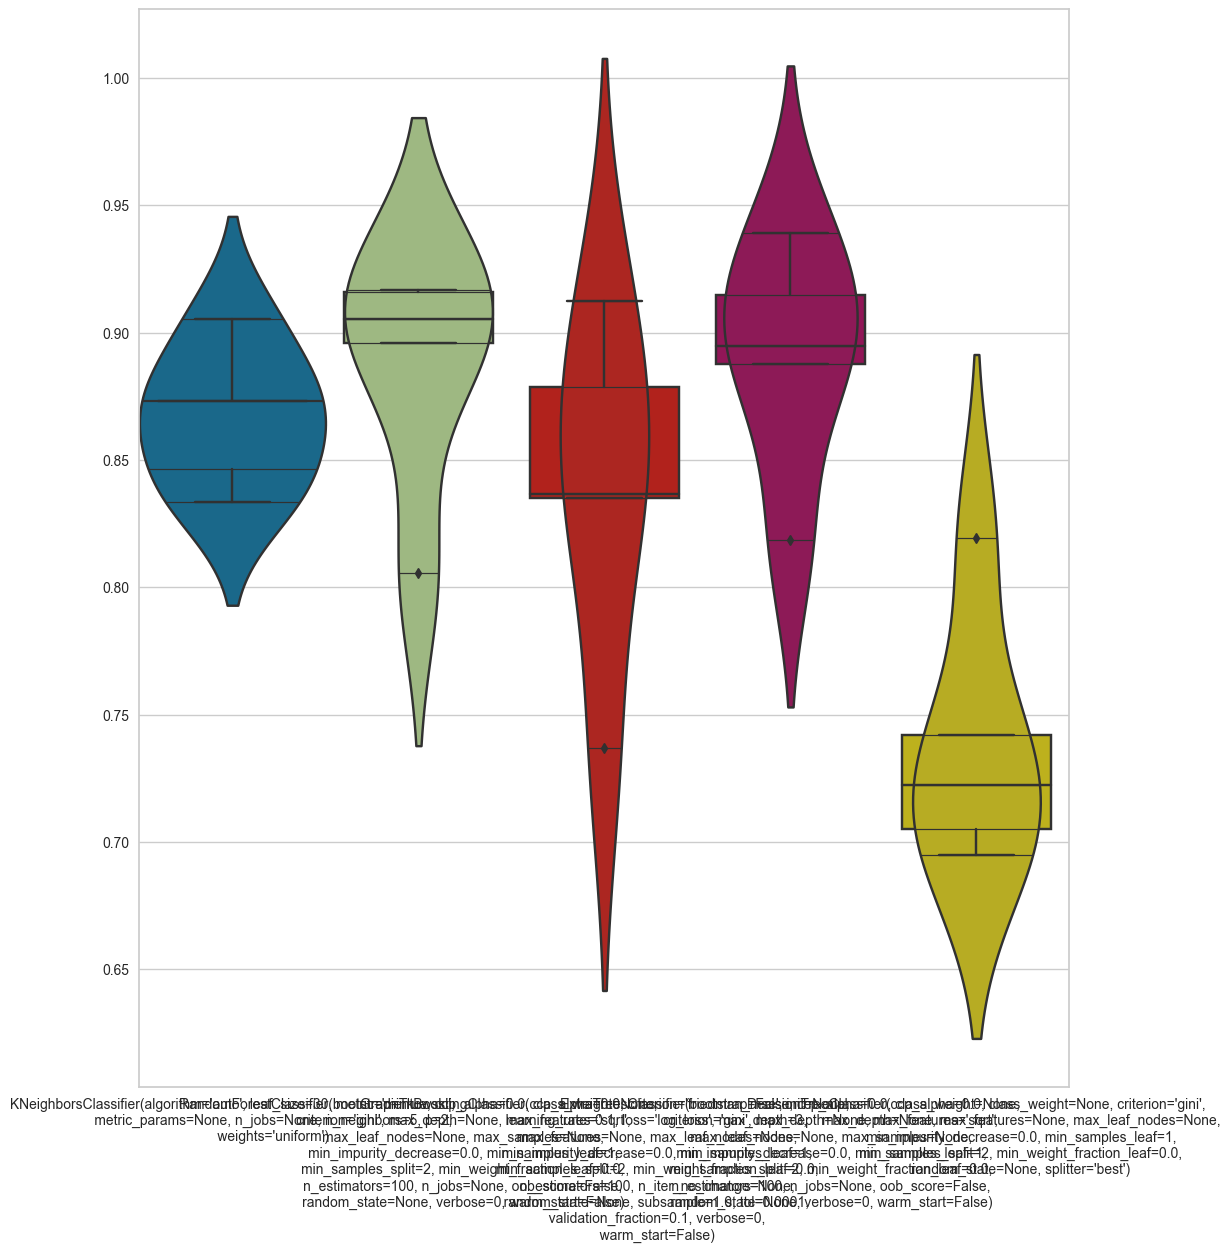

In [28]:
# Делаем самолетики без фичинга
plt.figure(figsize=(12, 14))
sns.boxplot(data=cv_df)
sns.violinplot(data=cv_df, inner="stick",saturation=0.7, width = 1)
plt.show();

In [29]:
cross_val = StratifiedKFold(n_splits=5, shuffle=True)
clf_list = [SVC(), LogisticRegression(), RidgeClassifier(), LinearDiscriminantAnalysis()]
cv_list = []
for clf in clf_list:
    pipe = Pipeline([('preprocessing', CT),
                ('classifier', clf)])
    #pipe.fit(X_train, y_train)
    cv_results = cross_validate(pipe, X_train, y_train, cv=5, n_jobs = -1, scoring = 'roc_auc')
    cv_list.append(cv_results['test_score'])
cv_list

[array([0.89122807, 0.91578947, 0.91319444, 0.92361111, 0.85555556]),
 array([0.9122807 , 0.92631579, 0.91666667, 0.93402778, 0.82962963]),
 array([0.89122807, 0.92631579, 0.91319444, 0.92708333, 0.82962963]),
 array([0.89122807, 0.92631579, 0.92013889, 0.91319444, 0.82962963])]

In [30]:
cv_df = pd.DataFrame(np.array(cv_list).T)
cv_df.columns = ['SVC','LogisticRegression', 'RidgeClassifier','LinearDiscriminantAnalysis'] 
#                  [str(i) for i in clf_list]
cv_df

,SVC,LogisticRegression,RidgeClassifier,LinearDiscriminantAnalysis
0,0.891228,0.912281,0.891228,0.891228
1,0.915789,0.926316,0.926316,0.926316
2,0.913194,0.916667,0.913194,0.920139
3,0.923611,0.934028,0.927083,0.913194
4,0.855556,0.829630,0.829630,0.829630


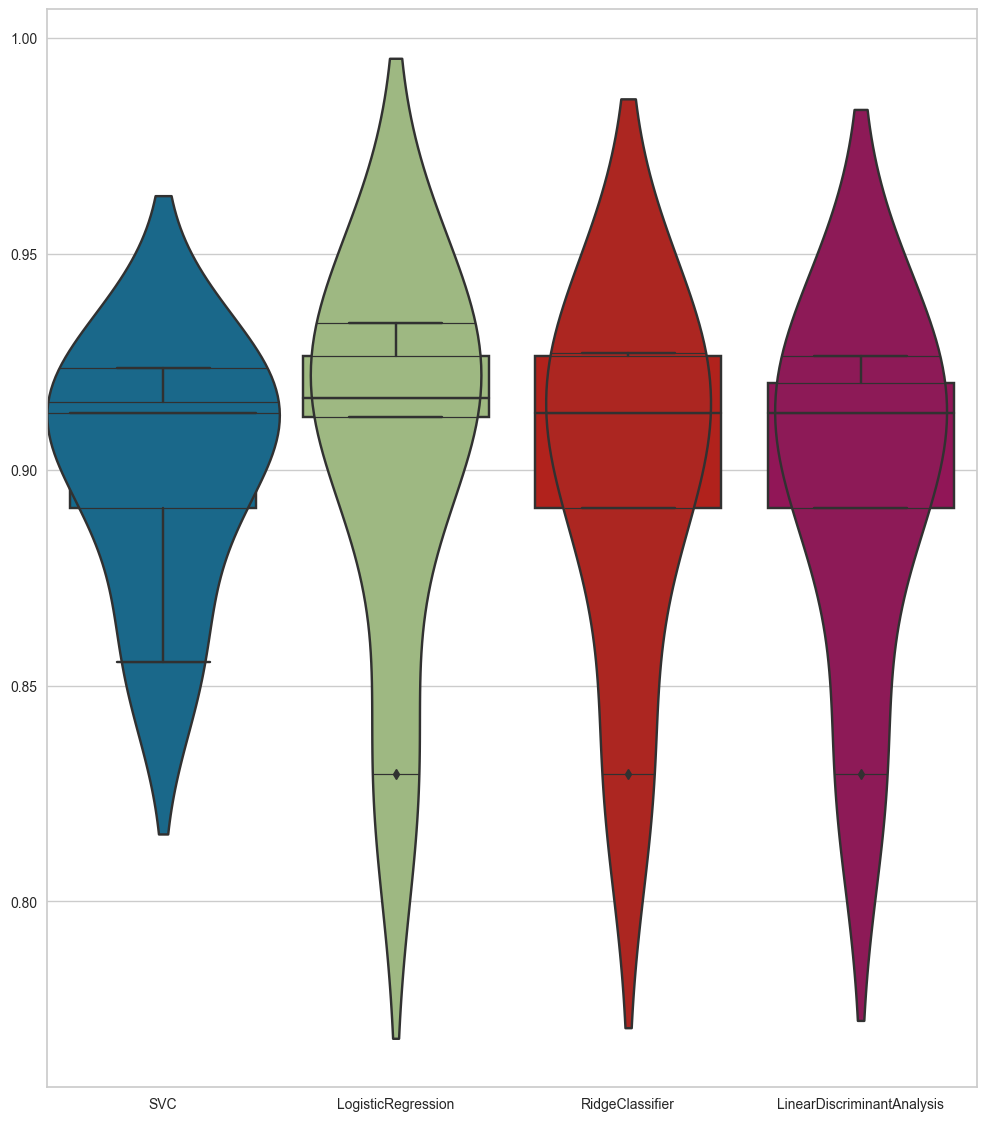

In [31]:
# Делаем самолетики без фичинга
plt.figure(figsize=(12, 14))
sns.boxplot(data=cv_df)
sns.violinplot(data=cv_df, inner="stick",saturation=0.7, width = 1)
plt.show();

## Посмотрим логистическую регрессию

In [54]:
clf = Pipeline([('preprocessing',CT),('classifier',LogisticRegression()) ]) 

param_grid =[
    {'classifier__penalty': ['l2'], 'classifier__solver': ['newton-cg' ,'lbfgs', 'liblinear', 'sag', 'saga'], 'classifier__C': [0.001, 0.01, 0.1, 1, 2, 5, 10]},
    {'classifier__penalty': ['l1'], 'classifier__solver': ['liblinear', 'saga'], 'classifier__C': [0.001, 0.01, 0.1, 1, 2, 5, 10]},
    {'classifier__penalty': ['elasticnet'], 'classifier__solver': ['lbfgs','newton-cg'], 'classifier__C': [0.001, 0.01, 0.1, 1, 10]}]

grid = GridSearchCV(clf, param_grid, return_train_score=True)

grid.fit(X_train, y_train)
clf_reg = grid.best_estimator_
clf_reg.fit(X_train,y_train)
print(grid.best_params_)

print(roc_auc_score(y_train, clf_reg.predict_proba(X_train)[:, 1]))
print(roc_auc_score(y_test, clf_reg.predict_proba(X_test)[:, 1]))

{'classifier__C': 5, 'classifier__penalty': 'l2', 'classifier__solver': 'newton-cg'}
0.9268774703557312
0.8821339950372209


In [55]:
pipe = Pipeline([ ('preprocessing', CT) ,
                 ('svc', LogisticRegression(C = 5, penalty = 'l2', solver = 'newton-cg' ))])
pipe.fit(X_train,y_train)
print(roc_auc_score(y_train, pipe.predict_proba(X_train)[:, 1]))
print(roc_auc_score(y_test, pipe.predict_proba(X_test)[:, 1]))

# Есть небольшое переобучение

0.9268774703557312
0.8821339950372209


## В целом норм, хотя можно поискать получше

## Смотрим RF

In [56]:
clf = Pipeline([('preprocessing', CT), ('classifier', RandomForestClassifier())])

param_grid = [
    {'classifier__n_estimators': [10, 50, 100, 200],
     'classifier__max_depth': [3, 5, 7]},
    {'classifier__n_estimators': [10, 50, 100],
     'classifier__max_depth': [None]},
]

grid = GridSearchCV(clf, param_grid, scoring='roc_auc', return_train_score=True)

grid.fit(X_train, y_train)

clf_reg = grid.best_estimator_
clf_reg.fit(X_train, y_train)

print(grid.best_params_)
print(roc_auc_score(y_train, clf_reg.predict_proba(X_train)[:, 1]))
print(roc_auc_score(y_test, clf_reg.predict_proba(X_test)[:, 1]))


{'classifier__max_depth': 3, 'classifier__n_estimators': 50}
0.9594861660079052
0.8635235732009925


In [57]:
pipe = Pipeline([ ('preprocessing', CT) ,
                 ('svc', RandomForestClassifier(max_depth = 5, n_estimators= 200))])
pipe.fit(X_train,y_train)
print(roc_auc_score(y_train, pipe.predict_proba(X_train)[:, 1]))
print(roc_auc_score(y_test, pipe.predict_proba(X_test)[:, 1]))

# Есть небольшое переобучение, но в целом норм


0.9950592885375493
0.858560794044665


## Посмотрим градиентный бустинг

In [36]:
## Смотрим по log loss-у потому что времени на roc auc переделывать нету.

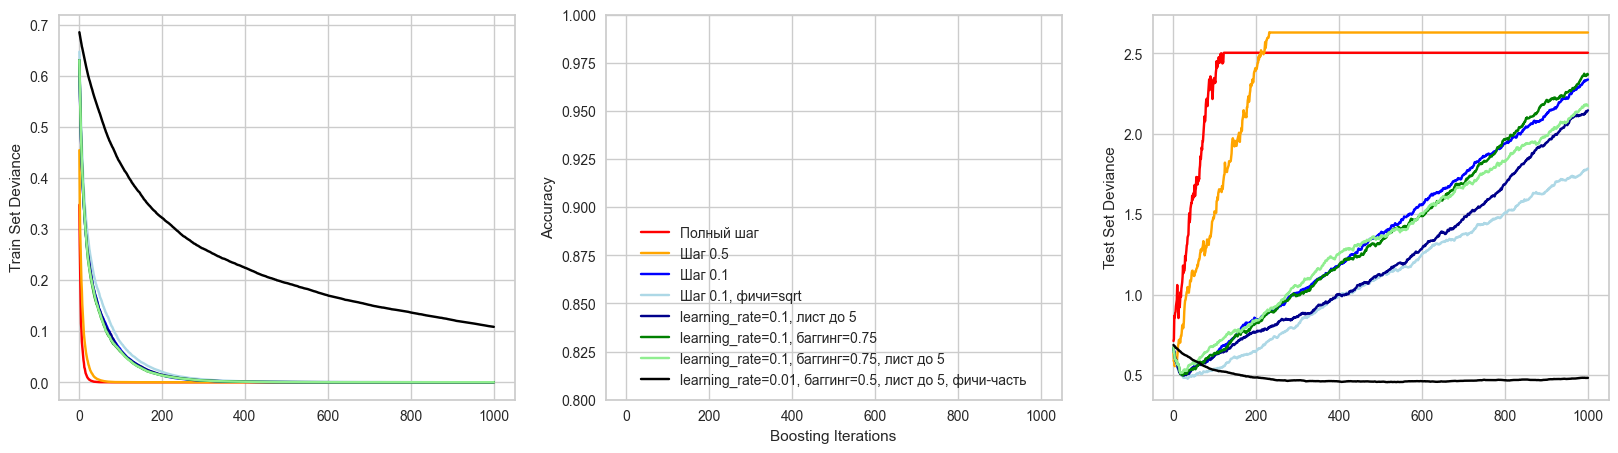

In [37]:
labels, y = np.unique(y, return_inverse=True)

original_params = {
    "n_estimators": 1000,
    #"max_leaf_nodes": None,
    #"max_depth": None,
    "random_state": 42,
    'criterion': 'friedman_mse'
}

fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

for label, color, setting in [
    ("Полный шаг", "red", {"learning_rate": 1.0, "subsample": 1.0}),
    ("Шаг 0.5", "orange", {"learning_rate": 0.5, "subsample": 1.0}),
    ("Шаг 0.1", "blue",   {"learning_rate": 0.1, "subsample": 1.0}),
    ("Шаг 0.1, фичи=sqrt",
              "lightblue", {"learning_rate": 0.1, "subsample": 1.0, "max_features": 'sqrt'},
    ),
    ("learning_rate=0.1, лист до 5",
               "darkblue", {"learning_rate": 0.1, "subsample": 1.0, "min_samples_split" : 5},
    ),
    ("learning_rate=0.1, баггинг=0.75",
                  "green", {"learning_rate": 0.1, "subsample": 0.75},
    ),
    ("learning_rate=0.1, баггинг=0.75, лист до 5",
             "lightgreen", {"learning_rate": 0.1, "subsample": 0.75, "min_samples_split" : 5},
    ),
    ("learning_rate=0.01, баггинг=0.5, лист до 5, фичи-часть",
             "black", {"learning_rate": 0.01, "subsample": 0.5, "min_samples_split" : 5, "max_features": 'sqrt'},
    ),
]:
    
    params = dict(original_params)
    params.update(setting)

    clf = Pipeline([('preprocessing', CT),
                ('classifier', GradientBoostingClassifier(**params))])

    clf.fit(X_train, y_train)
    
    train_deviance = np.zeros((params["n_estimators"],), dtype=np.float64)
    
    X_train_for_proba = CT.fit_transform(X_train)
    
    for i, y_pred in enumerate(clf['classifier'].staged_predict_proba(X_train_for_proba)):
        train_deviance[i] = log_loss(y_train, y_pred)
        
    ax1.plot(
        (np.arange(train_deviance.shape[0]) + 1),
        train_deviance,
        "-",
        color=color,
        label=label,
    )

    test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
    X_test_for_proba = CT.transform(X_test)
    for i, y_pred in enumerate(clf['classifier'].staged_predict(X_test_for_proba)):
        #clf.loss_ assumes that y_test[i] in {0, 1}
        test_score[i] = accuracy_score(y_test, y_pred)
        
    ax2.plot(
        (np.arange(test_score.shape[0]) + 1),
        test_score,
        "-",
        color=color,
        label=label,
    )
    
    test_deviance = np.zeros((params["n_estimators"],), dtype=np.float64)
    
    for i, y_pred in enumerate(clf['classifier'].staged_predict_proba(X_test_for_proba)):
        #clf.loss_ assumes that y_test[i] in {0, 1}
        test_deviance[i] = log_loss(y_test, y_pred)
        
    ax3.plot(
        (np.arange(test_deviance.shape[0]) + 1),
        test_deviance,
        "-",
        color=color,
        label=label,
    )

ax2.legend(loc='lower center')
ax2.set_xlabel("Boosting Iterations")
ax2.set_ylim(0.8, 1.)
ax1.set_ylabel("Train Set Deviance")
ax2.set_ylabel("Accuracy")
ax3.set_ylabel("Test Set Deviance")

plt.show()


In [38]:
# нормальные модели голубая, зеленая, синяя

In [61]:
# Синяя линия без фичинга
from sklearn.ensemble import GradientBoostingClassifier
gbc = Pipeline([('preprocessing', CT),('classifier', GradientBoostingClassifier(learning_rate = 0.1, subsample = 1, n_estimators = 130))])
gbc.fit(X_train, y_train)
print(roc_auc_score(y_train, gbc.predict_proba(X_train)[:, 1]))
print(roc_auc_score(y_test, gbc.predict_proba(X_test)[:, 1]))

1.0
0.7803970223325062


In [62]:
# Синяя линия без фичинга
from sklearn.ensemble import GradientBoostingClassifier
gbc = Pipeline([('preprocessing', CT),('classifier', GradientBoostingClassifier(learning_rate=0.1, subsample =1.0, max_features ='sqrt'))])
gbc.fit(X_train, y_train)
print(roc_auc_score(y_train, gbc.predict_proba(X_train)[:, 1]))
print(roc_auc_score(y_test, gbc.predict_proba(X_test)[:, 1]))

0.9997176736307171
0.8275434243176178


In [63]:
# Зеленая линия без фичинга
from sklearn.ensemble import GradientBoostingClassifier
gbc = Pipeline([('preprocessing', CT),('classifier', GradientBoostingClassifier(learning_rate= 0.1, subsample=0.75))])
gbc.fit(X_train, y_train)
print(roc_auc_score(y_train, gbc.predict_proba(X_train)[:, 1]))
print(roc_auc_score(y_test, gbc.predict_proba(X_test)[:, 1]))

1.0
0.7878411910669975


Видим небольшое переобучение на GB

## смотрим RidgeClassifier (позже узнала, что он поддерживает метрику roc auc)

In [42]:
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
pipe = Pipeline([('preprocessing', CT),
                ('classifier', RidgeClassifier())])

solver = ['auto','lbfgs','svd']
alpha = np.arange(0.01,3,0.1)


param_grid = [
    {'preprocessing': [CT],
    'classifier': [RidgeClassifier()],
     'classifier__solver': solver,
     'classifier__alpha': alpha
#      'classifier__learning_rate': learning_rate,
#       'classifier__subsample': subsample
#      'classifier__n_jobs': [-1] # задействовать все процессы
    }
] #решетка

# cross_val = StratifiedShuffleSplit(n_splits=3)
cross_val = StratifiedKFold(n_splits=5, shuffle=True)

grid = GridSearchCV(pipe,param_grid, cv=cross_val,
                    return_train_score = True,
                   n_jobs = -1, scoring='roc_auc') # решетчатый поиск

# for i in tqdm([1,2,3]):
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessing',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='passthrough',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('imputer_for_nums',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          KNNImputer(add_indicator=False,...
                                                                                                         n_neighbors=5,
                                                                                                         weights='uniform')),
                                                                                             ('scaler',
                                                                                              MinMaxScaler(clip=False,
                                                                                                           copy=True,
                                                                                                           feature_range=(0,
                                                                                                                          1)))],
                                                                                      verbose=False),
                                                                             ['age',
                                                                              'sex',
                                                                              'trestbps',
                                                                              'chol',
                                                                              'fbs',
                                                                              'restecg',
                                                                              'thalach',
                                                                              'exang',
                                                                              'oldpeak',
                                                                              'slope',
                                                                              'ca',
                                                                              'thal',
                                                                              'cp'])],
                                                              verbose=False,
                                                              verbose_feature_names_out=True)]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=0)

<AxesSubplot: xlabel='param_classifier__alpha', ylabel='param_classifier__solver'>

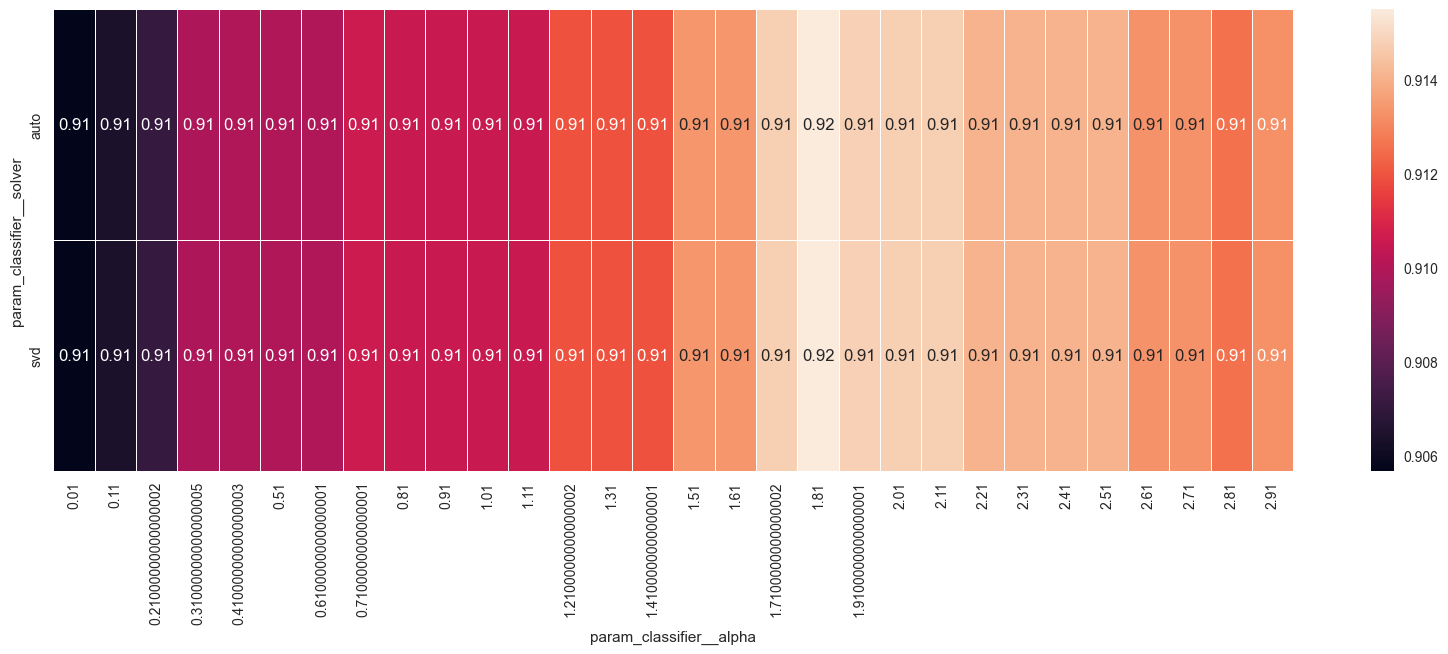

In [43]:
table=pd.DataFrame(grid.cv_results_)
pv_table=table.pivot_table(index='param_classifier__solver',columns='param_classifier__alpha',values='mean_test_score')
pv_table
f, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pv_table, annot=True, linewidths=.5, ax=ax)

In [44]:
pd.DataFrame(grid.cv_results_).sort_values(['rank_test_score'], ascending = [True]).T

,54,56,57,59,51,53,60,62,65,63,...,25,67,52,16,64,55,22,61,58,34
mean_fit_time,0.012004,0.011803,0.012203,0.018604,0.014403,0.013004,0.013203,0.014604,0.013203,0.013403,...,0.009802,0.016404,0.014803,0.007601,0.011403,0.012003,0.010203,0.011003,0.025406,0.009802
std_fit_time,0.001265,0.0004,0.00098,0.006889,0.002333,0.002608,0.001469,0.002577,0.001939,0.0012,...,0.000981,0.009267,0.003656,0.001357,0.001855,0.002098,0.000748,0.000632,0.027338,0.001471
mean_score_time,0.006201,0.006401,0.007202,0.007202,0.007002,0.006401,0.006402,0.007602,0.007202,0.006802,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std_score_time,0.00098,0.00049,0.000748,0.001167,0.001265,0.00049,0.001356,0.001744,0.000749,0.0004,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
param_classifier,"RidgeClassifier(alpha=1.81, class_weight=None,...","RidgeClassifier(alpha=1.81, class_weight=None,...","RidgeClassifier(alpha=1.81, class_weight=None,...","RidgeClassifier(alpha=1.81, class_weight=None,...","RidgeClassifier(alpha=1.81, class_weight=None,...","RidgeClassifier(alpha=1.81, class_weight=None,...","RidgeClassifier(alpha=1.81, class_weight=None,...","RidgeClassifier(alpha=1.81, class_weight=None,...","RidgeClassifier(alpha=1.81, class_weight=None,...","RidgeClassifier(alpha=1.81, class_weight=None,...",...,"RidgeClassifier(alpha=1.81, class_weight=None,...","RidgeClassifier(alpha=1.81, class_weight=None,...","RidgeClassifier(alpha=1.81, class_weight=None,...","RidgeClassifier(alpha=1.81, class_weight=None,...","RidgeClassifier(alpha=1.81, class_weight=None,...","RidgeClassifier(alpha=1.81, class_weight=None,...","RidgeClassifier(alpha=1.81, class_weight=None,...","RidgeClassifier(alpha=1.81, class_weight=None,...","RidgeClassifier(alpha=1.81, class_weight=None,...","RidgeClassifier(alpha=1.81, class_weight=None,..."
param_classifier__alpha,1.81,1.81,1.91,1.91,1.71,1.71,2.01,2.01,2.11,2.11,...,0.81,2.21,1.71,0.51,2.11,1.81,0.71,2.01,1.91,1.11
param_classifier__solver,auto,svd,auto,svd,auto,svd,auto,svd,svd,auto,...,lbfgs,lbfgs,lbfgs,lbfgs,lbfgs,lbfgs,lbfgs,lbfgs,lbfgs,lbfgs
param_preprocessing,"ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass...",...,"ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass..."
params,"{'classifier': RidgeClassifier(alpha=1.81, cla...","{'classifier': RidgeClassifier(alpha=1.81, cla...","{'classifier': RidgeClassifier(alpha=1.81, cla...","{'classifier': RidgeClassifier(alpha=1.81, cla...","{'classifier': RidgeClassifier(alpha=1.81, cla...","{'classifier': RidgeClassifier(alpha=1.81, cla...","{'classifier': RidgeClassifier(alpha=1.81, cla...","{'classifier': RidgeClassifier(alpha=1.81, cla...","{'classifier': RidgeClassifier(alpha=1.81, cla...","{'classifier': RidgeClassifier(alpha=1.81, cla...",...,"{'classifier': RidgeClassifier(alpha=1.81, cla...","{'classifier': RidgeClassifier(alpha=1.81, cla...","{'classifier': RidgeClassifier(alpha=1.81, cla...","{'classifier': RidgeClassifier(alpha=1.81, cla...","{'classifier': RidgeClassifier(alpha=1.81, cla...","{'classifier': RidgeClassifier(alpha=1.81, cla...","{'classifier': Ridge

In [45]:
# ridge = Pipeline([('preprocessing', CT),('classifier', RidgeClassifier(solver = 'svd', alpha =2.81))])
# ridge.fit(X_train, y_train)
# print(roc_auc_score(y_train, ridge.predict_proba(X_train)[:, 1]))
# print(roc_auc_score(y_test, ridge.predict_proba(X_test)[:, 1]))

## Итого лучшие модели GB и RF, и logreg. Выберем logreg потому что переобучение меньше всего